# **Statlog (German credit Data)**

This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix.

Data available on: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

## Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('german.data-numeric', sep=r'\s*[,|/t| ]\s*', engine='python')
df.head()

,1,6,4,12,5,5.1,3,4.1,1.1,67,...,0,0.1,1.4,0.2,0.3,1.5,0.4,0.5,1.6,1.7
0,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
1,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
2,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
3,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
4,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1


In [3]:
names = [f'feature {n}' for n in range(1, 25)]
names.append('target')
df = pd.read_csv('german.data-numeric', sep=r'\s*[,|/t| ]\s*', engine='python', header=None, names=names)
df.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,...,feature 16,feature 17,feature 18,feature 19,feature 20,feature 21,feature 22,feature 23,feature 24,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [4]:
print(df.info())
print('shape: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   feature 1   1000 non-null   int64
 1   feature 2   1000 non-null   int64
 2   feature 3   1000 non-null   int64
 3   feature 4   1000 non-null   int64
 4   feature 5   1000 non-null   int64
 5   feature 6   1000 non-null   int64
 6   feature 7   1000 non-null   int64
 7   feature 8   1000 non-null   int64
 8   feature 9   1000 non-null   int64
 9   feature 10  1000 non-null   int64
 10  feature 11  1000 non-null   int64
 11  feature 12  1000 non-null   int64
 12  feature 13  1000 non-null   int64
 13  feature 14  1000 non-null   int64
 14  feature 15  1000 non-null   int64
 15  feature 16  1000 non-null   int64
 16  feature 17  1000 non-null   int64
 17  feature 18  1000 non-null   int64
 18  feature 19  1000 non-null   int64
 19  feature 20  1000 non-null   int64
 20  feature 21  1000 non-null   int

In [5]:
df.isna().sum()

feature 1     0
feature 2     0
feature 3     0
feature 4     0
feature 5     0
feature 6     0
feature 7     0
feature 8     0
feature 9     0
feature 10    0
feature 11    0
feature 12    0
feature 13    0
feature 14    0
feature 15    0
feature 16    0
feature 17    0
feature 18    0
feature 19    0
feature 20    0
feature 21    0
feature 22    0
feature 23    0
feature 24    0
target        0
dtype: int64

Distribution of 4 random features:


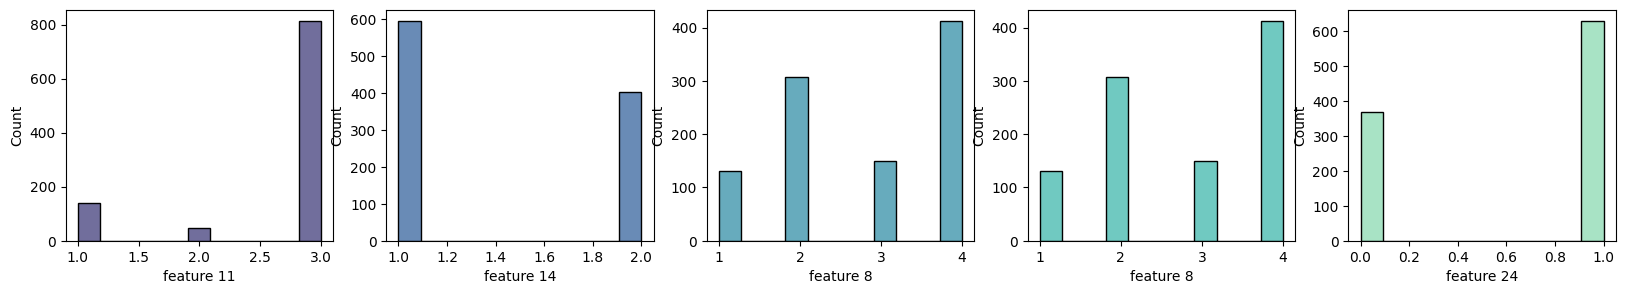

In [6]:
print('Distribution of 4 random features:')

palette = sns.color_palette('mako', n_colors=6)
plt.figure(figsize=(20, 3))
for i in range(1, 6):
    idx = np.random.randint(1, 24)
    plt.subplot(1, 5, i)
    sns.histplot(df.iloc[:, idx], color=palette[i])

<Axes: title={'center': 'Distribution of target'}, xlabel='target'>

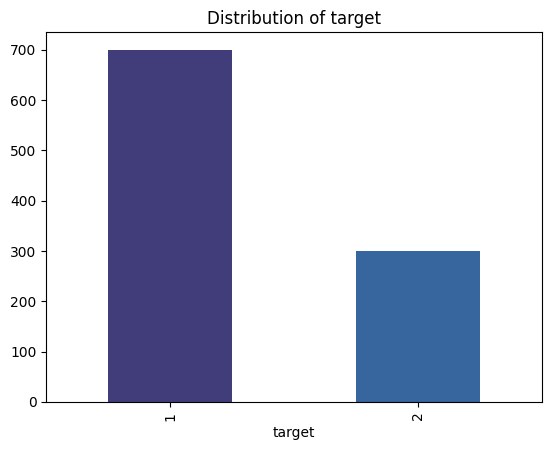

In [7]:
plt.title('Distribution of target')
df['target'].value_counts().plot(kind='bar', color=[palette[1], palette[2]])

<Axes: >

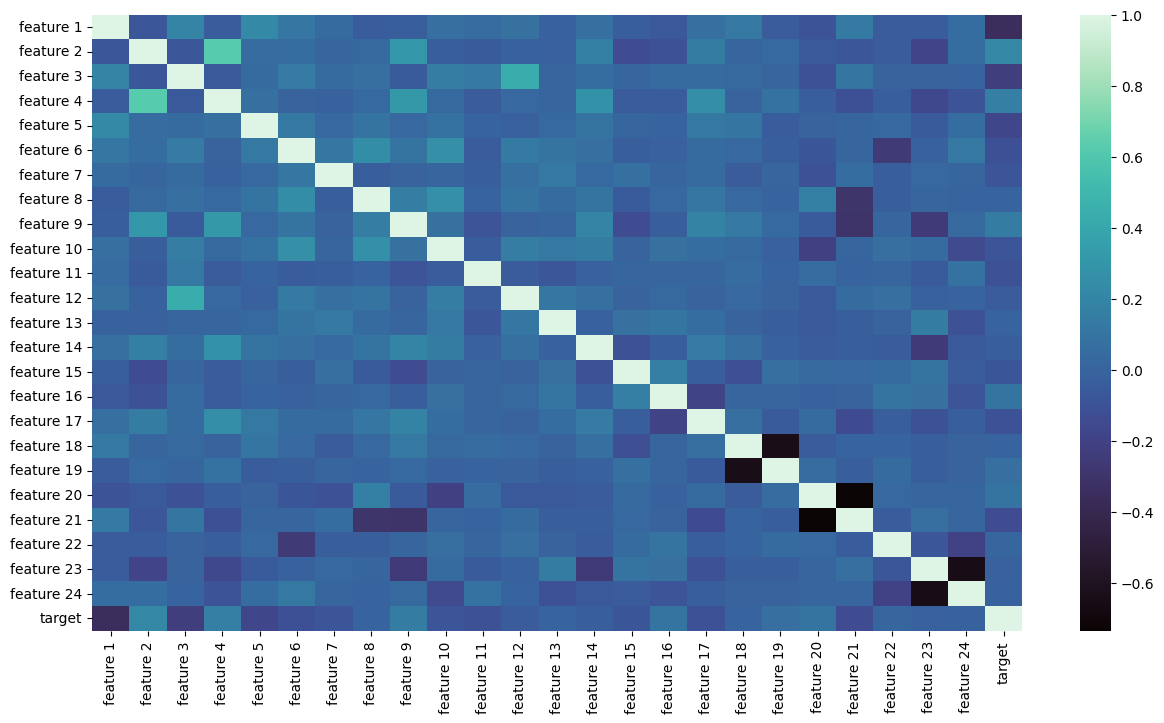

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap=sns.color_palette('mako', as_cmap=True))